# Basics

In this notebook, we introduce basic ways to read, show, explore and save images.


In [5]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy import ndimage
import os
%matplotlib nbagg

You can download the image used in this example here: [rabbit.jpg](./rabbit.jpg). The following code will work if the image is located in the same directory as the notebook itself. 

First, let's check if the file `rabbit.jpg` is in the current directory. 

In [10]:
files = os.listdir("./")
if "rabbit.jpg" in files:
    print("Ok, the file is in {0}".format(files))
else:
    print("The file is not in {0} , retry !".format(files))

Ok, the file is in ['rabbit.jpg', '.ipynb_checkpoints', '00_Basics.ipynb']


Now let's read it using **Python Image Library (aka PIL)**:

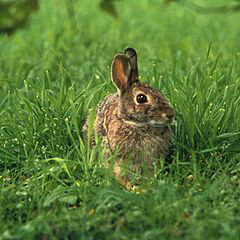

In [15]:
im = Image.open("rabbit.jpg")
im

## Numerical images

There are mainly two kinds of numerical images: 

* **Vectorial images** composed of basic geometric figures such as lines and polygons. They are very efficient to store schemes or curves. They are generally stored as `.svg`, `.pfg` or `.eps` files. In this tutorial, we will not work on such images.
* **Raster images**, also called **bitmaps** in which data is structures as matrix of **pixels**. Each pixel can contain from 1 to 4 values called **channels**. Images can then be sub classed by their number of channels: 
    * A single channel image is called grayscale, 
    * Most color images use 3 channels, one for red (R), one for green (G) and one for blue (B). They are called RGB images. 
    * Some image formats use a fourth channel called **alpha** corresponding to the transparency level of a given pixel.
    
In the current image, the channel structure can be obtained as follows:

In [28]:
im.getbands()

('R', 'G', 'B')

## From image to `numpy`

Now, the channel data can be extracted as follows:

In [50]:
R, G, B = im.split()
R = np.array(R)
G = np.array(G)
B = np.array(B)
R

array([[ 78,  85,  96, ...,  79,  70,  64],
       [ 72,  76,  84, ...,  99,  93,  89],
       [ 69,  71,  75, ..., 108, 101,  95],
       ..., 
       [120, 115, 101, ...,  73,  64,  38],
       [130, 109,  80, ...,  73,  58,  31],
       [113,  84,  60, ...,  72,  68,  53]], dtype=uint8)

<IPython.core.display.Javascript object>


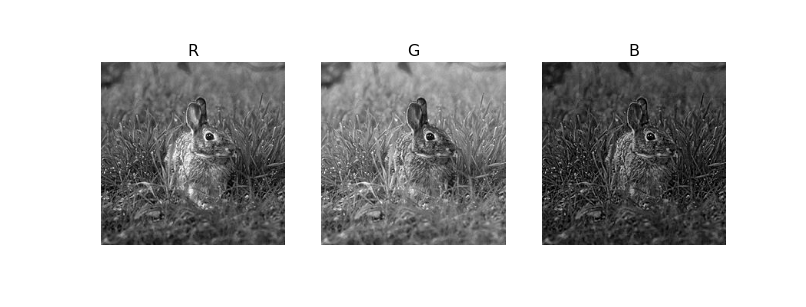

In [37]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 3, 1)
plt.title("R")
plt.imshow(R, cmap = cm.gray)
ax1.axis("off")
ax1 = fig.add_subplot(1, 3, 2)
plt.title("G")
plt.imshow(G, cmap = cm.gray)
ax1.axis("off")
ax1 = fig.add_subplot(1, 3, 3)
plt.title("B")
plt.imshow(B, cmap = cm.gray)
ax1.axis("off")
plt.show()


## From `numpy` to image

Let's now see how we can create an image from numpy.

In [48]:
r2 = np.arange(256).astype(np.uint8)
g2 = np.arange(256).astype(np.uint8)
R2, G2 = np.meshgrid(r2, g2)
B2 = np.zeros_like(R2).astype(np.uint8)

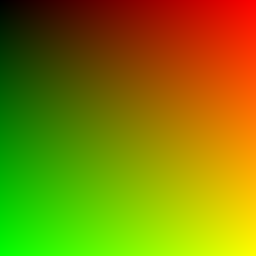

In [49]:
im2 = Image.fromarray(np.dstack([R2, G2, B2]))
im2

Let's apply that to the rabbit image. For example, we can switch channels:

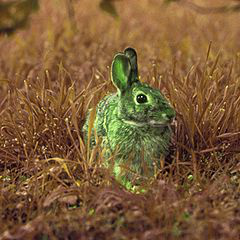

In [56]:
im3 = Image.fromarray(np.dstack([G, R, B]))
im3